# Exoplanet
<!-- Author: Xiaorong Yan -->
<!-- Date:  2021/12/15-->
If you ever imagined there is another world out there in space, you probably heard about exoplanets. Exoplanets are planets that are in other solar systems located in our universe. These solar systems can be very different from ours, such as some have binary star (two stars as the center of the solar system), massive Jovian planets orbiting closer to the host star. However, exoplanets are pretty hard to find. If you are interested, learn more about them here https://exoplanets.nasa.gov/. .
The goal of this project is to use skills I learned from data science class to solve a problem I find interesting in, in this case, astronomy related. Since I major in CS and minor in astronomy, this will be my first ever project for me to combine my knowledge in both field. The dataset I will be using is from NASA's exoplanet archive. It documented all the exoplanet candidates from TESS[1] Detail see below. 
Found in https://github.com/awesomedata/awesome-public-datasets.

Exoplanet data available from
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=TOI
NASA Exoplanet Archive
To use up-to-date data, you can either: 
a) download from the link
b) use NASA's API (refer to https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html)

From NASA Exoplanet Archive's front page, we can see that there are total of 4884 confirmed exoplanets, 175 of which came from TESS, which has 4708 candidates (as of December 16th, 2021). That leave us double check a lot of candidates. If we can use data science to help confirming the potential candidate from TESS, we will definitely speed up the process. From the data science class, I recalled that we used sklearn to train models on dataset to predict results. Further examing the dataset confirmed my idea that using what I have learned to predict condidates is indeed doable. So here we go. 




[1] Transit Surveys. Launched in April 2018, TESS is surveying the sky for two years to find transiting exoplanets around the brightest stars near Earth.


In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# displaying all data in a dataframe
pd.set_option('display.max_columns', None)



The downloaded csv files are not well formatted since the top 1*n cells are name description, so pd.read_csv() does not work nicely. So, we are ignoring the first n rows by using "skiprows" parameter in read_csv() function.

In [2]:
df_TOI = pd.read_csv('TOI_202112.csv', skiprows = 69)
df_TOI.head()

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_dist,st_disterr1,st_disterr2,st_distlim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,0.0,-0.076,0.072,-0.072,0.0,2.459230e+06,0.001657,-0.001657,0,2.171348,0.000264,-0.000264,0,2.017220,0.319588,-0.319588,0,656.886099,37.778210,-37.778210,0,5.818163,1.910546,-1.910546,0,22601.948581,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,9.604000,0.013,-0.013,0,485.735,11.9515,-11.9515,0,10249.0,264.7,-264.7,0,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2021-10-29 12:59:15
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,0.0,-15.555,0.072,-0.072,0.0,2.459250e+06,0.001925,-0.001925,0,1.931671,0.000008,-0.000008,0,3.180000,0.173000,-0.173000,0,1030.000000,207.830000,-207.830000,0,10.316800,3.214590,-3.214590,0,42432.800000,NaN,NaN,NaN,3998.000000,NaN,NaN,NaN,9.423440,0.006,-0.006,0,295.862,5.9100,-5.9100,0,7070.0,126.4,-126.4,0,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2021-10-29 12:59:15
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,0.0,-2.249,0.206,-0.206,0.0,2.459202e+06,0.001161,-0.001161,0,1.867588,0.000152,-0.000152,0,2.211864,0.094625,-0.094625,0,1657.147109,69.077340,-69.077340,0,36.432872,21.315702,-21.315702,0,20641.445701,NaN,NaN,NaN,3057.065736,NaN,NaN,NaN,9.299501,0.058,-0.058,0,943.109,106.3330,-106.3330,0,8924.0,124.0,-124.0,0,NaN,NaN,NaN,0,5.73255,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,0.0,1.640,0.055,-0.055,0.0,2.458493e+06,0.005350,-0.005350,0,2.743230,0.001080,-0.001080,0,3.167000,0.642000,-0.642000,0,383.410000,0.781988,-0.781988,0,NaN,NaN,NaN,0,1177.360000,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,9.300300,0.037,-0.037,0,7728.170,1899.5700,-1899.5700,0,5388.5,567.0,-567.0,0,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,0.0,9.347,0.062,-0.062,0.0,2.459230e+06,0.002365,-0.002365,0,3.577575,0.000669,-0.000669,0,2.934708,0.343917,-0.343917,0,501.602877,35.867390,-35.867390,0,5.050111,1.345575,-1.345575,0,8092.969136,NaN,NaN,NaN,2419.060447,NaN,NaN,NaN,9.135500,0.006,-0.006,0,356.437,4.6175,-4.6175,0,9219.0,171.1,-171.1,0,4.14,0.07,-0.07,0,2.15040,0.060467,-0.060467,0,2019-07-24 15:58:33,2021-10-29 12:59:15


The PS dataset containing all confirmed exoplanets, but it also contains exoplanets found by other methods (not TESS). The TOI (TESS Object of Interest) dataframe contains all the candidates collected from TESS. These two dataframes' column use different format and contains columns that we do not need for our project. Therefore, we need to tidy up the data and only leave what's useful.

In [3]:
# The first step is to see what columns are in the data frame we need to keep by making their name more descriptive.
print(df_TOI.shape)
df_TOI.columns

(4708, 65)


Index(['toi', 'tid', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra',
       'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec', 'st_pmdecerr1',
       'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1',
       'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2',
       'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist',
       'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1', 'st_loggerr2',
       'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
       'toi_created', 'rowupda

In [4]:
# column description from the website, https://exoplanetarchive.ipac.caltech.edu/docs/API_TOI_columns.html
# Using the descriptive name to replace the shorter version that is used in the csv file.
dscpt = requests.get('https://exoplanetarchive.ipac.caltech.edu/docs/API_TOI_columns.html').text
soup = BeautifulSoup(dscpt, 'html.parser')
table = soup.find_all('table')
for t in table:
    print(t.text)




Database
        Column Name
Table Label
Description
 Uncertainties Column
        (positive +)
        (negative -)
Limit Column


toi†
TESS Object of Interest
 A number used to identify and track a TESS Object of Interest (TOI). 
        TOIs are identified and numbered by the TESS Project. A TOI name has 
        an integer and a decimal part of the format TOI-NNNNN.DD. The integer 
        part designates the target star; the two-digit decimal part identifies 
        a unique transiting object associated with that star. 
 
 


toipfx
TESS Object of Interest Prefix
The integer portion of the TOI Identifier, designating the target star. (See toi description above.)
 
 


tid†
TESS Input Catalog ID

        Target identification number, as listed in the TESS Input Catalog (TIC).
  
 
 


ctoi_alias
Community TESS Object of Interest Alias

    A number used to identify and track a Community-identified TESS Object of Interest (CTOI). A CTOI name has an integer and a decimal part, whe

In [5]:
# Renaming the columns
df_TOI = df_TOI.rename(columns={
    'toi': 'TESS Object of Interest',
    'tid':'TESS Object of Interest Prefix',
    'tfopwg_disp': 'Disposition',
    'rastr':'Right Ascension',
    'ra':'Right Ascension Decimal', 
    'decstr':'Declination',
    'dec':'Declination Decimal',
    'st_pmra': 'PMRA',
    'st_pmraerr1':'PMRA Upper Unc', 
    'st_pmraerr2':'PMRA Lower Unc', 
    'st_pmralim':'PMRA Limit Flag', 
    'st_pmdec':'PMDec', 
    'st_pmdecerr1':'PMDec Upper Unc',
    'st_pmdecerr2':'PMDec Lower Unc', 
    'st_pmdeclim':'PMDec Limit Flag', 
    'pl_tranmid':'Planet Transit Midpoint Value',
    'pl_tranmiderr1':'Planet Transit Midpoint Upper Unc',
    'pl_tranmiderr2':'Planet Transit Midpoint Lower Unc',
    'pl_tranmidlim':'Planet Transit Midpoint Limit Flag',
    'pl_orbper':'Planet Orbital Period Value',
    'pl_orbpererr1':'Planet Orbital Period Upper Unc',
    'pl_orbpererr2':'Planet Orbital Period Lower Unc',
    'pl_orbperlim':'Planet Orbital Period Limit Flag', 
    'pl_trandurh':'Planet Transit Duration Value',
    'pl_trandurherr1':'Planet Transit Duration Upper Unc',
    'pl_trandurherr2':'Planet Transit Duration Lower Unc', 
    'pl_trandurhlim':'Planet Transit Duration Limit Flag',
    'pl_trandep':'Planet Transit Depth Value', 
    'pl_trandeperr1':'Planet Transit Depth Upper Unc',
    'pl_trandeperr2':'Planet Transit Depth Lower Unc',
    'pl_trandeplim':'Planet Transit Depth Limit Flag',
    'pl_rade':'Planet Radius Value',
    'pl_radeerr1':'Planet Radius Value Upper Unc',
    'pl_radeerr2':'Planet Radius Value Lower Unc',
    'pl_radelim':'Planet Radius Limit Flag',
    'pl_insol':'Planet Insolation Value',
    'pl_insolerr1':'Planet Insolation Upper Unc',
    'pl_insolerr2':'Planet Insolation Lower Unc',
    'pl_insollim':'Planet Insolation Limit Flag',
    'pl_eqt':'Planet Equilibrium Temperature Value',
    'pl_eqterr1':'Planet Equilibrium Temperature Upper Unc',
    'pl_eqterr2':'Planet Equilibrium Temperature Lower Unc',
    'pl_eqtlim':'Planet Equilibrium Temperature Limit Flag',
    'st_tmag':'TESS Magnitude',
    'st_tmagerr1':'TESS Magnitude Upper Unc',
    'st_tmagerr2':'TESS Magnitude Lower Unc',
    'st_tmaglim':'TESS Magnitude Limit Flag',
    'st_dist':'Stellar Distance',
    'st_disterr1':'Stellar Distance Upper Unc',
    'st_disterr2':'Stellar Distance Lower Unc',
    'st_distlim':'Stellar Distance Limit Flag',
    'st_teff':'Stellar Effective Temperature Value',
    'st_tefferr1':'Stellar Effective Termperature Upper Unc',
    'st_tefferr2':'Stellar Effective Termperature Lower Unc',
    'st_tefflim':'Stellar Effective Temperature Limit Flag',
    'st_logg':'Stellar log(g) Value',
    'st_loggerr1':'Stellar log(g) Upper Unc',
    'st_loggerr2':'Stellar log(g) Lower Unc',
    'st_logglim':'Stellar log(g) Limit Flag',
    'st_rad':'Stellar Radius Value', 
    'st_raderr1':'Stellar Radius Upper Unc',
    'st_raderr2':'Stellar Radius Lower Unc',
    'st_radlim':'Stellar Radius Limit Flag',
    'toi_created':'TOI Created Date',
    'rowupdate':'Date Modified'
})

Now the columns are in descriptive names, we can clearly see "Disposition" column is what we need to seperate the training data and testing data, where known planets (KP) and confirmed planets(CP) are suitable for training data. Other columns like "Right Ascensions" "Declination" related columns only tell us where to find the target in the sky, so they're not as important in this case. There are also columns with nearly all empty data, so natually next step is to drop those columns. Other columns are important since they describe the property of the exoplanet or the host star or about the trasit values.

In [23]:
df_TOI_cleaned = df_TOI.drop(columns=[
    'TESS Object of Interest',
    'TESS Object of Interest Prefix',
    'Right Ascension',
    'Right Ascension Decimal',
    'Declination',
    'Declination Decimal',
    'PMRA',
    'PMRA Upper Unc',
    'PMRA Lower Unc',
    'PMRA Limit Flag',
    'PMDec',
    'PMDec Upper Unc',
    'PMDec Lower Unc',
    'PMDec Limit Flag',  
    'Date Modified',
#     'Planet Insolation Upper Unc',
#     'Planet Insolation Lower Unc',
#     'Planet Insolation Limit Flag',
#     'Planet Equilibrium Temperature Upper Unc',
#     'Planet Equilibrium Temperature Lower Unc',
#     'Planet Equilibrium Temperature Limit Flag'
])

In [7]:
df_TOI_cleaned.head()

,Disposition,Planet Transit Midpoint Value,Planet Transit Midpoint Upper Unc,Planet Transit Midpoint Lower Unc,Planet Transit Midpoint Limit Flag,Planet Orbital Period Value,Planet Orbital Period Upper Unc,Planet Orbital Period Lower Unc,Planet Orbital Period Limit Flag,Planet Transit Duration Value,Planet Transit Duration Upper Unc,Planet Transit Duration Lower Unc,Planet Transit Duration Limit Flag,Planet Transit Depth Value,Planet Transit Depth Upper Unc,Planet Transit Depth Lower Unc,Planet Transit Depth Limit Flag,Planet Radius Value,Planet Radius Value Upper Unc,Planet Radius Value Lower Unc,Planet Radius Limit Flag,Planet Insolation Value,Planet Insolation Upper Unc,Planet Insolation Lower Unc,Planet Insolation Limit Flag,Planet Equilibrium Temperature Value,Planet Equilibrium Temperature Upper Unc,Planet Equilibrium Temperature Lower Unc,Planet Equilibrium Temperature Limit Flag,TESS Magnitude,TESS Magnitude Upper Unc,TESS Magnitude Lower Unc,TESS Magnitude Limit Flag,Stellar Distance,Stellar Distance Upper Unc,Stellar Distance Lower Unc,Stellar Distance Limit Flag,Stellar Effective Temperature Value,Stellar Effective Termperature Upper Unc,Stellar Effective Termperature Lower Unc,Stellar Effective Temperature Limit Flag,Stellar log(g) Value,Stellar log(g) Upper Unc,Stellar log(g) Lower Unc,Stellar log(g) Limit Flag,Stellar Radius Value,Stellar Radius Upper Unc,Stellar Radius Lower Unc,Stellar Radius Limit Flag
0,FP,2.459230e+06,0.001657,-0.001657,0,2.171348,0.000264,-0.000264,0,2.017220,0.319588,-0.319588,0,656.886099,37.778210,-37.778210,0,5.818163,1.910546,-1.910546,0,22601.948581,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,9.604000,0.013,-0.013,0,485.735,11.9515,-11.9515,0,10249.0,264.7,-264.7,0,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0
1,PC,2.459250e+06,0.001925,-0.001925,0,1.931671,0.000008,-0.000008,0,3.180000,0.173000,-0.173000,0,1030.000000,207.830000,-207.830000,0,10.316800,3.214590,-3.214590,0,42432.800000,NaN,NaN,NaN,3998.000000,NaN,NaN,NaN,9.423440,0.006,-0.006,0,295.862,5.9100,-5.9100,0,7070.0,126.4,-126.4,0,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0
2,FP,2.459202e+06,0.001161,-0.001161,0,1.867588,0.000152,-0.000152,0,2.211864,0.094625,-0.094625,0,1657.147109,69.077340,-69.077340,0,36.432872,21.315702,-21.315702,0,20641.445701,NaN,NaN,NaN,3057.065736,NaN,NaN,NaN,9.299501,0.058,-0.058,0,943.109,106.3330,-106.3330,0,8924.0,124.0,-124.0,0,NaN,NaN,NaN,0,5.73255,NaN,NaN,0
3,FP,2.458493e+06,0.005350,-0.005350,0,2.743230,0.001080,-0.001080,0,3.167000,0.642000,-0.642000,0,383.410000,0.781988,-0.781988,0,NaN,NaN,NaN,0,1177.360000,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,9.300300,0.037,-0.037,0,7728.170,1899.5700,-1899.5700,0,5388.5,567.0,-567.0,0,4.15,1.64,-1.64,0,NaN,NaN,NaN,0
4,FP,2.459230e+06,0.002365,-0.002365,0,3.577575,0.000669,-0.000669,0,2.934708,0.343917,-0.343917,0,501.602877,35.867390,-35.867390,0,5.050111,1.345575,-1.345575,0,8092.969136,NaN,NaN,NaN,2419.060447,NaN,NaN,NaN,9.135500,0.006,-0.006,0,356.437,4.6175,-4.6175,0,9219.0,171.1,-171.1,0,4.14,0.07,-0.07,0,2.15040,0.060467,-0.060467,0


In [24]:
# Next we have to clean the null values
# Some columns are just filled with NaN, so we are going to get rid of those columns first,
# then we clear out the entries with some NaN values
df_TOI_cleaned.isna().any()


Disposition                                   True
Planet Transit Midpoint Value                False
Planet Transit Midpoint Upper Unc             True
Planet Transit Midpoint Lower Unc             True
Planet Transit Midpoint Limit Flag           False
Planet Orbital Period Value                   True
Planet Orbital Period Upper Unc               True
Planet Orbital Period Lower Unc               True
Planet Orbital Period Limit Flag             False
Planet Transit Duration Value                False
Planet Transit Duration Upper Unc             True
Planet Transit Duration Lower Unc             True
Planet Transit Duration Limit Flag           False
Planet Transit Depth Value                   False
Planet Transit Depth Upper Unc                True
Planet Transit Depth Lower Unc                True
Planet Transit Depth Limit Flag              False
Planet Radius Value                           True
Planet Radius Value Upper Unc                 True
Planet Radius Value Lower Unc  

In [25]:
# before and after cleaning out the null values 
print(df_TOI_cleaned.shape)
df_TOI_cleaned=df_TOI_cleaned.dropna(how='all',axis='columns')
df_TOI_cleaned=df_TOI_cleaned.dropna()
print(df_TOI_cleaned.shape)

(4708, 50)
(3048, 44)


In [26]:
df_TOI_cleaned.to_csv('TOI_cleaned.csv',encoding='utf-8', index=False)
df_TOI_cleaned

,Disposition,Planet Transit Midpoint Value,Planet Transit Midpoint Upper Unc,Planet Transit Midpoint Lower Unc,Planet Transit Midpoint Limit Flag,Planet Orbital Period Value,Planet Orbital Period Upper Unc,Planet Orbital Period Lower Unc,Planet Orbital Period Limit Flag,Planet Transit Duration Value,Planet Transit Duration Upper Unc,Planet Transit Duration Lower Unc,Planet Transit Duration Limit Flag,Planet Transit Depth Value,Planet Transit Depth Upper Unc,Planet Transit Depth Lower Unc,Planet Transit Depth Limit Flag,Planet Radius Value,Planet Radius Value Upper Unc,Planet Radius Value Lower Unc,Planet Radius Limit Flag,Planet Insolation Value,Planet Equilibrium Temperature Value,TESS Magnitude,TESS Magnitude Upper Unc,TESS Magnitude Lower Unc,TESS Magnitude Limit Flag,Stellar Distance,Stellar Distance Upper Unc,Stellar Distance Lower Unc,Stellar Distance Limit Flag,Stellar Effective Temperature Value,Stellar Effective Termperature Upper Unc,Stellar Effective Termperature Lower Unc,Stellar Effective Temperature Limit Flag,Stellar log(g) Value,Stellar log(g) Upper Unc,Stellar log(g) Lower Unc,Stellar log(g) Limit Flag,Stellar Radius Value,Stellar Radius Upper Unc,Stellar Radius Lower Unc,Stellar Radius Limit Flag,TOI Created Date
0,FP,2.459230e+06,0.001657,-0.001657,0,2.171348,0.000264,-0.000264,0,2.017220,0.319588,-0.319588,0,656.886099,37.778210,-37.778210,0,5.818163,1.910546,-1.910546,0,22601.948581,3127.204052,9.60400,0.013,-0.013,0,485.735,11.9515,-11.9515,0,10249.0,264.7,-264.7,0,4.19,0.07,-0.07,0,2.169860,0.072573,-0.072573,0,2019-07-24 15:58:33
1,PC,2.459250e+06,0.001925,-0.001925,0,1.931671,0.000008,-0.000008,0,3.180000,0.173000,-0.173000,0,1030.000000,207.830000,-207.830000,0,10.316800,3.214590,-3.214590,0,42432.800000,3998.000000,9.42344,0.006,-0.006,0,295.862,5.9100,-5.9100,0,7070.0,126.4,-126.4,0,4.03,0.09,-0.09,0,2.010000,0.090000,-0.090000,0,2019-07-24 15:58:33
4,FP,2.459230e+06,0.002365,-0.002365,0,3.577575,0.000669,-0.000669,0,2.934708,0.343917,-0.343917,0,501.602877,35.867390,-35.867390,0,5.050111,1.345575,-1.345575,0,8092.969136,2419.060447,9.13550,0.006,-0.006,0,356.437,4.6175,-4.6175,0,9219.0,171.1,-171.1,0,4.14,0.07,-0.07,0,2.150400,0.060467,-0.060467,0,2019-07-24 15:58:33
7,PC,2.459248e+06,0.001300,-0.001300,0,6.998921,0.000014,-0.000014,0,3.953000,0.437000,-0.437000,0,2840.000000,0.943618,-0.943618,0,14.775200,0.764705,-0.764705,0,448.744000,1282.000000,8.87759,0.006,-0.006,0,283.291,3.0025,-3.0025,0,6596.0,139.2,-139.2,0,3.71,0.09,-0.09,0,2.700000,0.130000,-0.130000,0,2019-07-24 15:58:33
12,PC,2.459231e+06,0.003123,-0.003123,0,2.469696,0.000579,-0.000579,0,2.324444,0.426817,-0.426817,0,233.437161,24.522572,-24.522572,0,1.454938,1.905983,-1.905983,0,555.196630,1238.030816,8.23880,0.006,-0.006,0,52.620,0.0793,-0.0793,0,5413.7,132.8,-132.8,0,4.46,0.09,-0.09,0,0.941335,0.054613,-0.054613,0,2019-07-24 15:58:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,PC,2.459229e+06,0.001173,-0.001173,0,1.461071,0.000120,-0.000120,0,1.092088,0.300594,-0.300594,0,984.139638,64.283280,-64.283280,0,5.406180,3.090609,-3.090609,0,10492.975563,2581.335267,10.06340,0.006,-0.006,0,366.482,5.4090,-5.4090,0,8035.0,150.8,-150.8,0,4.28,0.08,-0.08,0,1.667970,0.052161,-0.052161,0,2019-07-24 15:58:33
4702,FP,2.459230e+06,0.004039,-0.004039,0,2.396722,0.000696,-0.000696,0,3.945317,0.709913,-0.709913,0,384.898547,33.798634,-33.798634,0,3.838449,1.934889,-1.934889,0,15531.063624,2847.213599,10.02670,0.006,-0.006,0,543.152,19.1305,-19.1305,0,10393.0,222.8,-222.8,0,4.32,0.07,-0.07,0,1.877390,0.078985,-0.078985,0,2019-07-24 15:58:33
4705,FP,2.459230e+06,0.000340,-0.000340,0,8.413486,0.000264,-0.000264,0,3.556833,0.031893,-0.031893,0,17479.605331,107.768585,-107.768585,0,20.510696,5.176719,-5.176719,0,127.916421,857.731431,9.77270,0.006,-0.006,0,113.667,0.2655,-0.2655,0,5786.0,132.9,-132.9,0,4.52,0.08,-

let's explore the planets size in our candidate. A simple histograph will show the distribution well in our data. 


87.0155


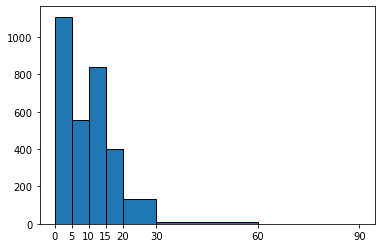

In [53]:
xmax = df_TOI_cleaned['Planet Radius Value'].max()
print(xmax)
bins = [0,5,10,15,20,30,60,90]
plt.hist(df_TOI_cleaned['Planet Radius Value'].values, bins=bins,edgecolor='k')
plt.xticks(bins)
plt.show()

The histograph shows the exoplanet candidates' size is mostly around the lower end, between 1 to 5 Earth's radius. The majority of the size is under 20 Earth's radius. With only a few that got about 60. To put this into perspective, Jupiter, the larger planet in our solar system, has about 11 times Earth's radius in size. However, there are false positive candidates in there and their values can be faulty, so let's clean then out.


In [58]:
df_TOI_actual = df_TOI_cleaned.loc[((df_TOI_cleaned['Disposition'] == 'KP') | (df_TOI_cleaned['Disposition'] == 'CP'))]
df_TOI_actual

,Disposition,Planet Transit Midpoint Value,Planet Transit Midpoint Upper Unc,Planet Transit Midpoint Lower Unc,Planet Transit Midpoint Limit Flag,Planet Orbital Period Value,Planet Orbital Period Upper Unc,Planet Orbital Period Lower Unc,Planet Orbital Period Limit Flag,Planet Transit Duration Value,Planet Transit Duration Upper Unc,Planet Transit Duration Lower Unc,Planet Transit Duration Limit Flag,Planet Transit Depth Value,Planet Transit Depth Upper Unc,Planet Transit Depth Lower Unc,Planet Transit Depth Limit Flag,Planet Radius Value,Planet Radius Value Upper Unc,Planet Radius Value Lower Unc,Planet Radius Limit Flag,Planet Insolation Value,Planet Equilibrium Temperature Value,TESS Magnitude,TESS Magnitude Upper Unc,TESS Magnitude Lower Unc,TESS Magnitude Limit Flag,Stellar Distance,Stellar Distance Upper Unc,Stellar Distance Lower Unc,Stellar Distance Limit Flag,Stellar Effective Temperature Value,Stellar Effective Termperature Upper Unc,Stellar Effective Termperature Lower Unc,Stellar Effective Temperature Limit Flag,Stellar log(g) Value,Stellar log(g) Upper Unc,Stellar log(g) Lower Unc,Stellar log(g) Limit Flag,Stellar Radius Value,Stellar Radius Upper Unc,Stellar Radius Lower Unc,Stellar Radius Limit Flag,TOI Created Date
54,KP,2.459364e+06,0.000699,-0.000699,0,2.180577,0.000118,-0.000118,0,2.905781,0.053719,-0.053719,0,16604.092709,468.629200,-468.629200,0,16.690068,0.900878,-0.900878,0,1770.411541,1879.175845,11.06570,0.006,-0.006,0,314.9950,7.06550,-7.06550,0,6599.00,200.00000,-200.00000,0,4.21017,1.964110,-1.964110,0,1.271460,0.063558,-0.063558,0,2019-07-15 19:20:04
60,CP,2.458665e+06,0.001819,-0.001819,0,15.507730,0.000110,-0.000110,0,5.049360,0.234605,-0.234605,0,636.167452,29.705004,-29.705004,0,3.054769,0.415494,-0.415494,0,104.833086,816.101811,8.43620,0.006,-0.006,0,88.4343,0.28175,-0.28175,0,6122.00,194.00000,-194.00000,0,4.30881,0.268555,-0.268555,0,1.170920,0.054673,-0.054673,0,2019-08-16 20:20:48
61,CP,2.458661e+06,0.000839,-0.000839,0,17.471288,0.000068,-0.000068,0,4.297932,0.157239,-0.157239,0,1219.549615,39.652325,-39.652325,0,3.437103,0.401317,-0.401317,0,53.370112,689.357140,8.08880,0.006,-0.006,0,57.2651,0.18695,-0.18695,0,5783.54,7.82429,-7.82429,0,4.49925,0.019231,-0.019231,0,0.974669,0.054698,-0.054698,0,2019-08-16 20:20:47
77,KP,2.458656e+06,0.000152,-0.000152,0,2.977637,0.000002,-0.000002,0,3.124044,0.017571,-0.017571,0,12242.370611,63.922530,-63.922530,0,14.036909,0.744052,-0.744052,0,865.492990,1383.361352,10.42930,0.006,-0.006,0,197.9960,3.03800,-3.03800,0,5703.00,188.00000,-188.00000,0,4.25824,0.298282,-0.298282,0,1.220260,0.064412,-0.064412,0,2019-08-16 20:20:41
87,CP,2.458654e+06,0.000388,-0.000388,0,0.518239,0.000005,-0.000005,0,0.749996,0.178829,-0.178829,0,797.261857,47.291542,-47.291542,0,1.140383,0.710072,-0.710072,0,255.143207,1019.332220,10.11650,0.007,-0.007,0,20.3730,0.01920,-0.01920,0,3325.00,102.00000,-102.00000,0,4.88693,0.098941,-0.098941,0,0.390989,0.011740,-0.011740,0,2019-08-16 20:20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,CP,2.459220e+06,0.000800,-0.000800,0,10.626584,0.000017,-0.000017,0,5.415000,0.119000,-0.119000,0,7530.000000,0.641108,-0.641108,0,12.033500,0.407719,-0.407719,0,571.007000,1361.000000,10.97390,0.030,-0.030,0,340.5430,4.82700,-4.82700,0,7723.00,270.70000,-270.70000,0,4.43000,0.080000,-0.080000,0,1.350000,0.040000,-0.040000,0,2019-07-12 19:27:36
4612,CP,2.459365e+06,0.000350,-0.000350,0,3.739576,0.000098,-0.000098,0,2.026428,0.021158,-0.021158,0,15464.526583,156.807220,-156.807220,0,13.982100,0.737088,-0.737088,0,353.313699,1105.757437,10.57210,0.006,-0.006,0,158.6490,0.72150,-0.72150,0,5565.00,187.00000,-187.00000,0,4.46277,0.287097,-0.287097,0,1.000180,0.052111,-0.052111,0,2019-07-15 19:20:08
4650,CP,2.458442e+06,0.004960,-0.004960,0,4.327650,0.001730,-0.001730,0,3.181000,0.479000,-0.479000,0,1480.000000,2.

23.720461899999997


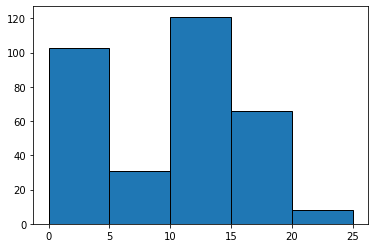

In [63]:
# Now we have the confirmed and known planets, let's make the histograph again 
xmax = df_TOI_actual['Planet Radius Value'].max()
print(xmax)
bins = [0,5,10,15,20,25]
plt.hist(df_TOI_actual['Planet Radius Value'].values, bins=bins,edgecolor='k')
plt.xticks(bins)
plt.show()

As we can see, the known planets are concentrated in the lower range, under 15 Earth's radius. The maximum not exceeding 25 Earth's radius. This give us a hint on how we can use this planet radius value to predict a planet candidate later.

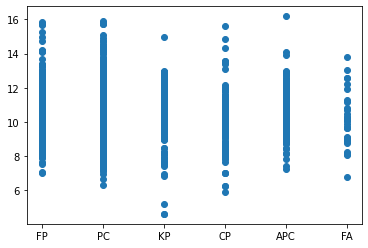

In [64]:
# Let's take a look at another column, TESS magnitude. We'll do a scatter plot to see the known/confirmed planets and candidates
# in other dispositions
plt.scatter(x=df_TOI_cleaned['Disposition'], y=df_TOI_cleaned['TESS Magnitude'])

Since the scatter plot is a little cramped and we can't see the distribution in each collection, let's make it a violin plot so
the characteristic is more visible.

In [69]:
unq = df_TOI_cleaned.Disposition.unique()
unq

array(['FP', 'PC', 'KP', 'CP', 'APC', 'FA'], dtype=object)